# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
    - **Task 2: Classification** Classify for review score
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


# <span style='color:blue'>Data Preparation (15 points total)</span>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when convertin to/ from CSV file format</span>
*[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [1]:
# set up environment and load dataset

import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import copy

# set working directory
os.chdir(r"C:\Users\justi\GitHub\olist\data")
print('Current working directory:',os.getcwd())

# Let's get the data
olist_download = pd.read_csv('olist_lab1_data.csv')  
print(olist_download.shape)
olist_download.head()

Current working directory: C:\Users\justi\GitHub\olist\data
(114067, 47)


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [2]:
olist = copy.deepcopy(olist_download) # so now we have a back up of the original dataset

## <span style='color:red'>Define class variable representations (int,float, onehot, etc)</span>

In [3]:
olist.info() #initial variable Dtypes - we will need to fix these!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [4]:
# clean up attributes in the relaoded dataset from lab 1

#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['customer_city','customer_state','customer_zip_code_prefix','seller_zip_code_prefix',
                'seller_city','seller_state','product_category_english','review_id','review_comment_title',
                'review_comment_message','payment_type','order_item_id', 'product_id','seller_id','order_id', 
                'customer_id','customer_unique_id','delivery_est_discrepancy_range','purchase_month','purchase_wk_day',
                'review_score_class'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [5]:
# use the "astype" function to change the variable type

olist[cat_features] = olist.copy()[cat_features].astype('category')

olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)


In [6]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")

In [7]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

In [8]:
# 4 possible outcomes for payment type
olist.payment_type.value_counts()

credit_card    84163
boleto         22203
voucher         6068
debit_card      1633
Name: payment_type, dtype: int64

In [9]:
print(olist.duplicated().sum())

0


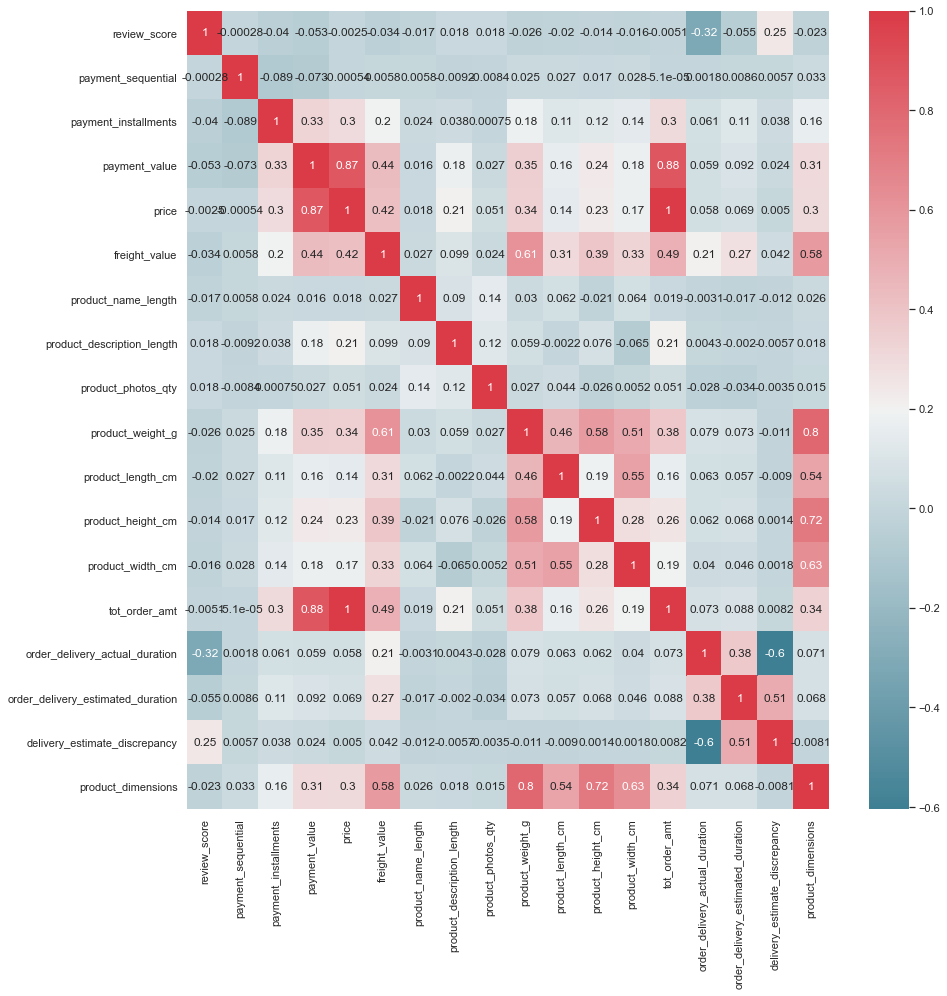

In [14]:
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(14,14))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [10]:
# let's remove nominal values (anything with the label x_id) and anything with possible NaNs such as the comments
olist = olist.drop(columns = ['review_comment_title','review_comment_message','review_id','order_id','customer_id',
                              'order_item_id','product_id','seller_id','customer_unique_id','product_length_cm',
                              'product_width_cm','product_height_cm','payment_value','delivery_estimate_discrepency'], axis=1) 


In [11]:
print(olist.duplicated().sum())
# looks like removing those columns made it look like we have duplicates, to keep from overfitting the model
# we  will go ahead and remove those
olist.drop_duplicates(inplace=True)
print(olist.duplicated().sum())

10324
0


In [12]:
olist[['order_approved_at','order_delivered_customer_date','price']].duplicated

<bound method DataFrame.duplicated of          order_approved_at order_delivered_customer_date   price
0      2018-04-25 22:15:09           2018-05-09 17:36:51   79.80
1      2018-06-26 11:18:58           2018-06-29 20:32:09   17.00
2      2017-12-14 09:52:34           2017-12-18 17:24:41   56.99
3      2017-12-06 12:13:20           2017-12-21 01:35:51   89.90
4      2017-12-06 12:13:20           2017-12-21 01:35:51   89.90
...                    ...                           ...     ...
114062 2018-05-16 12:39:20           2018-05-22 17:28:28  179.80
114063 2018-03-10 03:55:25           2018-03-16 13:09:51  297.00
114064 2017-08-18 10:04:56           2017-08-23 22:25:56   79.00
114065 2018-08-07 23:45:00           2018-08-21 22:41:46  349.00
114066 2017-12-06 02:50:09           2018-02-05 14:59:09  169.90

[103743 rows x 3 columns]>

In [13]:
# remove the response variable - payment_method
olist_y = copy.deepcopy(olist.payment_type)
olist_X = copy.deepcopy(olist.drop(columns=['payment_type']))
print(olist_y.value_counts())
print('\n=====================\nolist_X\n=====================\n')
olist_X.info()

credit_card    76836
boleto         19703
voucher         5677
debit_card      1527
Name: payment_type, dtype: int64

olist_X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103743 entries, 0 to 114066
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_purchase_timestamp           103743 non-null  datetime64[ns]
 1   order_approved_at                  103743 non-null  datetime64[ns]
 2   order_delivered_carrier_date       103743 non-null  datetime64[ns]
 3   order_delivered_customer_date      103743 non-null  datetime64[ns]
 4   order_estimated_delivery_date      103743 non-null  datetime64[ns]
 5   customer_zip_code_prefix           103743 non-null  category      
 6   customer_city                      103743 non-null  category      
 7   customer_state                     103743 non-null  category      
 8   review_score                       10

In [15]:
# before we get started, we need to remove fields with NaN - as in the comment title and message fields
X = copy.deepcopy(olist_X)
y = copy.deepcopy(olist_y)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103743 entries, 0 to 114066
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_purchase_timestamp           103743 non-null  datetime64[ns]
 1   order_approved_at                  103743 non-null  datetime64[ns]
 2   order_delivered_carrier_date       103743 non-null  datetime64[ns]
 3   order_delivered_customer_date      103743 non-null  datetime64[ns]
 4   order_estimated_delivery_date      103743 non-null  datetime64[ns]
 5   customer_zip_code_prefix           103743 non-null  category      
 6   customer_city                      103743 non-null  category      
 7   customer_state                     103743 non-null  category      
 8   review_score                       103743 non-null  float64       
 9   review_creation_date               103743 non-null  datetime64[ns]
 10  review_answer_timest

In [16]:
bad_seed = X[X.product_weight_g.isna()].index.values.tolist()[0]
print('Row Index:',bad_seed, 'has NaN\'s')
X = X.drop(index = [bad_seed], axis = 0)
y = y.drop(index = [bad_seed], axis = 0)

X.isna().any()


Row Index: 40711 has NaN's


order_purchase_timestamp             False
order_approved_at                    False
order_delivered_carrier_date         False
order_delivered_customer_date        False
order_estimated_delivery_date        False
customer_zip_code_prefix             False
customer_city                        False
customer_state                       False
review_score                         False
review_creation_date                 False
review_answer_timestamp              False
payment_sequential                   False
payment_installments                 False
payment_value                        False
shipping_limit_date                  False
price                                False
freight_value                        False
product_name_length                  False
product_description_length           False
product_photos_qty                   False
product_weight_g                     False
product_length_cm                    False
product_height_cm                    False
product_wid

In [17]:
print(X.shape, y.shape)

(103742, 37) (103742,)


##### StratifiedShuffleSplit Train/Test
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?highlight=stratifiedshufflesplit#sklearn.model_selection.StratifiedShuffleSplit

In [18]:
# train/ test split
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(test_size = 0.3, train_size = 0.7, random_state=42) #note default is 10 splits!

print(cv)
print(cv.get_n_splits(X,y))

# fill in the training and testing data and save as separate variables
for trainidx, testidx in cv.split(X,y):
    # using a dataframe we need to reference the rows using pd.iloc[] notation
    # if we were using a numpy array or sparse matrix, we would be able to just use X[<index>]
    X_train, X_test = X.iloc[trainidx], X.iloc[testidx] 
    y_train, y_test = y.iloc[trainidx], y.iloc[testidx]


StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7)
10
TRAIN: [31413 46983 96330 ... 41392 45195 95899] | TEST: [ 75032 103393  94289 ...  15565  93654  87498]
TRAIN: [12147 32341 89007 ... 11354 63225 55138] | TEST: [62210  2838 94691 ... 44726 16428 15331]
TRAIN: [44645   839  9341 ... 34766 38153 69016] | TEST: [61640 71551 51816 ... 40839 92833 42626]
TRAIN: [ 80032  95280  30546 ... 103162  21290  99469] | TEST: [ 9601 79137 59604 ... 58252 69124 31621]
TRAIN: [94008 20169 72152 ... 35301 53347 55327] | TEST: [69609 82659 14355 ...  7493 20053  3308]
TRAIN: [91559 36916 48265 ... 14699 97075 26359] | TEST: [97246 29465 84261 ... 75090 54381 30442]
TRAIN: [12553 75117 50114 ... 23841 71732 92629] | TEST: [52262 30844 86503 ... 34608 28796 62723]
TRAIN: [59335 31279 96297 ... 81882 75030 76430] | TEST: [39409 50906 61732 ...  5730 23364  2665]
TRAIN: [85659 98335 95758 ... 72065 88553 21754] | TEST: [102289  70824  68006 ...  44925  49586 

In [19]:
print('Let\'s take a look at how our training/ test splits came out:')
print(cv,'\nn_splits:',cv.get_n_splits(X,y))
print('X_train.shape:',X_train.shape, 'X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape, 'y_test.shape:',y_test.shape)


Let's take a look at how our training/ test splits came out:
StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=0.7) 
n_splits: 10
X_train.shape: (72619, 37) X_test.shape: (31123, 37)
y_train.shape: (72619,) y_test.shape: (31123,)


In [20]:
X_train.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,customer_city,customer_state,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class,delivery_est_discrepancy_range
count,72619,72619,72619,72619,72619.0,72619,72619,72619,72619,72619,72619
unique,13723,3684,27,73,2030.0,568,22,7,12,3,5
top,22790,sao paulo,SP,bed_bath_table,14940.0,sao paulo,SP,Monday,August,good,too early
freq,102,11330,30624,7527,5264.0,18019,51649,11783,7955,56198,51512


In [21]:
X_test.describe(include=['category'], exclude='datetime')

,customer_zip_code_prefix,customer_city,customer_state,product_category_english,seller_zip_code_prefix,seller_city,seller_state,purchase_wk_day,purchase_month,review_score_class,delivery_est_discrepancy_range
count,31123,31123,31123,31123,31123.0,31123,31123,31123,31123,31123,31123
unique,10544,2724,27,72,1723.0,489,21,7,12,3,5
top,29101,sao paulo,SP,bed_bath_table,14940.0,sao paulo,SP,Monday,August,good,too early
freq,41,4931,13046,3257,2269.0,7657,22114,5070,3393,24307,22145


##### <span style='color:red'><b>SelectKBest Feature Selection</b></span>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#

In [28]:
# use SelectKBest from Sklearn to get an idea of best features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# scale numerical variables in place
scaler = StandardScaler(copy=False) #this way we can just replace the raw data with the scaled data
scaler.fit_transform(X_train.select_dtypes('float64','int64'))
scaler.fit_transform(X_train.select_dtypes('float64','int64'))


# convert categorical variables into numeric values
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=130000) 
# use 130,000 for unknown because it is big enough to not be confused with other categories
enc.fit(X_train) # 
X_train_num = enc.transform(X_train)
X_test_num = enc.transform(X_test)

    
# convert the resonse variables into numeric values using LabelEncoder 
le = LabelEncoder()
le.fit(y_train)
y_train_num = le.transform(y_train)
y_test_num = le.transform(y_test)
    
# build the feature selection function using SelectKBest
# Note here: i ran this and determined that I wanted k=16 total
# after running this the first time, I decided that I wanted to keep the top 11 features to make sure and include
# payment_sequential since that just feel intuitively important when determining how a customer will pay
skb = SelectKBest(chi2, k=11)  
skb.fit(X_train_num,y_train_num)
X_train_feats = skb.transform(X_train_num)
X_test_feats = skb.transform(X_test_num)


# create a dataframe matching feature names to chi^2 scores
cols = np.array(X.columns)
pd.options.display.float_format = '{:.2f}'.format # remove that pesky scientific notation
feat_scores = pd.DataFrame({'feature':cols, 'score':skb.scores_, 'p_values': skb.pvalues_})

# sort by score values in descending order
feat_scores.sort_values(by = ['score'], axis=0, ascending=False, inplace=True, ignore_index=True)

# print out feature chi^2 scores
print(feat_scores)


                              feature       score  p_values
0                       payment_value 12280357.61      0.00
1            order_purchase_timestamp  5106536.22      0.00
2       order_delivered_customer_date  4951218.06      0.00
3             review_answer_timestamp  4862630.90      0.00
4                 shipping_limit_date  4684714.59      0.00
5                   order_approved_at  4517226.56      0.00
6        order_delivered_carrier_date  4060282.04      0.00
7                       tot_order_amt  1994911.24      0.00
8                               price   361777.13      0.00
9            customer_zip_code_prefix   250812.87      0.00
10                 payment_sequential   106147.66      0.00
11                 product_dimensions    60492.14      0.00
12                   product_weight_g    33675.06      0.00
13               payment_installments    31634.61      0.00
14               review_creation_date    22661.71      0.00
15                      freight_value   

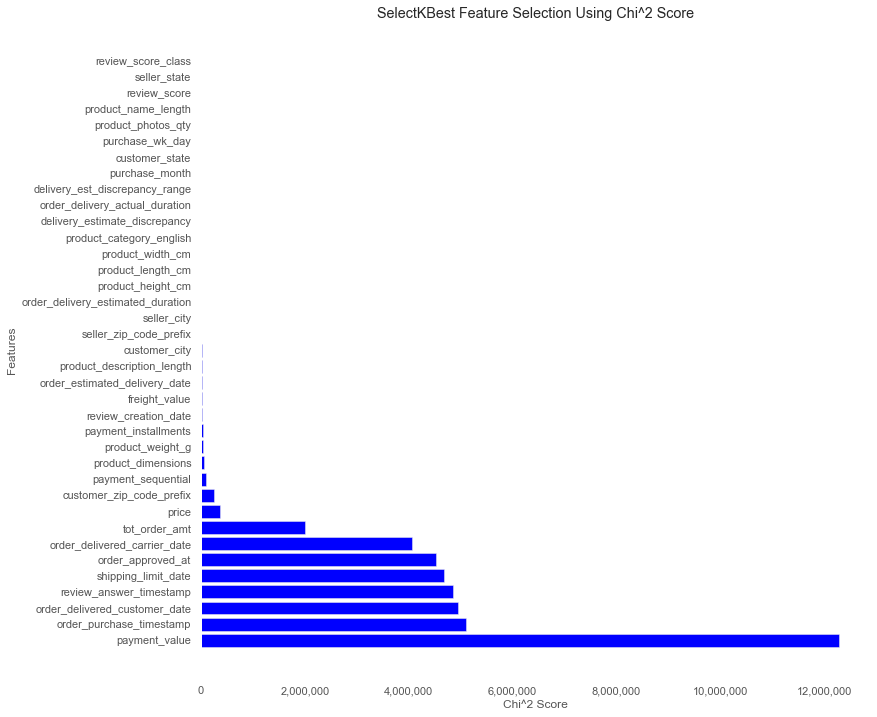

In [33]:
# let's also plot the scores to get a visual sense of what features are deemed most important
from matplotlib import pyplot

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,12))

ft = feat_scores.feature
width = feat_scores.score

ax.barh(ft, width=width, align='center', color='blue')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(ft)
ax.set_yticklabels(ft)

plt.title('SelectKBest Feature Selection Using Chi^2 Score')
plt.ylabel('Features')
plt.xlabel('Chi^2 Score')
plt.show()



#Note I want to keep the top 15, so we will rerun this using k=15 to get our X_train_feats/ X_test_feats with 15 features

# <span style='color:blue'>Data Preparation  - Summary (15 points total)</span>
## <u>Categorizing How a Customer Will Pay For an Order from Olist</u>
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). 
    - <span style='color:blue'>Brining in clean data from Lab 1, will require redefining variable representations that were lost when convertin to/ from CSV file format</span>
    - <span style='color:blue'>Defined class variables based on the classes used and determined in Lab 1.</span>
    - <span style='color:blue'>StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,train_size=0.7) was used to split the training and test data using k=10 fold for cross validation in the training set, this was done prior to utilizing any feature reduction in order to prevent data leakage</span>
    - <span style='color:blue'>Since we don't plan to use logistic regression for determining how someone is going to pay, we did not one-hot encode any variables for this section.</span>
    - <span style='color:blue'>We did use scikit learn's OrdinalEncoder and LabelEncoder in order to utilize scikit learn's SelectKBest function for feature reduction</span>   
  
* Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.  
    - <span style='color:blue'> For initial dimensionality reduction we removed nominal values (anything with the label x_id) and anything with possible NaNs such as the comments. We also removed highly correlated values such as weight, length and height that were all use to form the product_dimensions feature in Lab 1, payment_value that is highly correlated with tot_order_amt and price and delivery_estimate_discrepency since that was a variable created in Lab 1 for so data analysis.</span>
    - <span style='color:blue'>We utilized scikit learn's SelectKBest for feature selection and determined the best k was about 16 features, we could've gone more or lesss, in fact there was a big dropoff in the chi^2 score between the 14th and 15th feature, but the 16th feaure is called payment_installments and that just intuitively feels like something that affects what payment method a customer is going to use</span>
    
* [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).<br>
    - <span style='color:blue'>dtypes: category(4), datetime64[ns](6), float64(6)</span><br>
    - <span style='color:blue'>no new variables were created for this categorization exercise</span>



# Modeling and Evaluation (70 points total)
* [10 points] 
    - Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). 
    - Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* [10 points] 
    - Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). 
    - Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* [20 points] Create <span style="color:blue"> **three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two).**</span> Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### Model Selection
- KNN
- Naive Bayes
- Random Forest

In [75]:
import random
# generate some values of K
random_K = random.sample(range(1,1000), 10)
purpose_K = list(range(1,15,2))
purpose_K, random_K
K = purpose_K + random_K
K

[1, 3, 5, 7, 9, 11, 13, 171, 251, 831, 375, 639, 693, 661, 541, 642, 209]

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from IPython.html import widgets 
import random

# the data splits and the feature selection were dont in the preprocessing section above
# the feature selected and scaled datasets are
# X_train_feats
# X_test_feats
# y_train_num
# y_test_num

# generate some values of K
random_K = random.sample(range(50,1000), 10)
purpose_K = list(range(1,30,5))
purpose_K, random_K
K_list = purpose_K + random_K


# calculate the accuracy and print it for various values of K 
accuracy = []

for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K, weights='uniform', metric='euclidean', n_jobs=-1)
    clf.fit(X_train_feats,y_train_num)
    yhat = clf.predict(X_test_feats)
    acc = accuracy_score(y_test_num, yhat)
    accuracy.append(acc)
    print('K-neighbors:',K,' Accuracy:', acc)

   
#=====================================
m_acc=max(accuracy)
print('The best accuracy is:',m_acc ,' with ',K_list[accuracy.index(m_acc)] ,' neighbor(s)')

K-neighbors: 1  Accuracy: 0.7269222118690357
K-neighbors: 6  Accuracy: 0.7270828647623944
K-neighbors: 11  Accuracy: 0.7459435144426951
K-neighbors: 16  Accuracy: 0.7462326896507406
K-neighbors: 21  Accuracy: 0.746650387173473
K-neighbors: 26  Accuracy: 0.746296950808084
K-neighbors: 367  Accuracy: 0.7407383606978761
K-neighbors: 213  Accuracy: 0.7414773640073258
K-neighbors: 817  Accuracy: 0.740641968961861
K-neighbors: 221  Accuracy: 0.7414131028499823
K-neighbors: 719  Accuracy: 0.740641968961861
K-neighbors: 586  Accuracy: 0.740641968961861
K-neighbors: 485  Accuracy: 0.740641968961861
K-neighbors: 314  Accuracy: 0.74099540532725
K-neighbors: 512  Accuracy: 0.740641968961861
K-neighbors: 150  Accuracy: 0.7426340648395078
The best accuracy is: 0.746650387173473  with  21  neighbor(s)


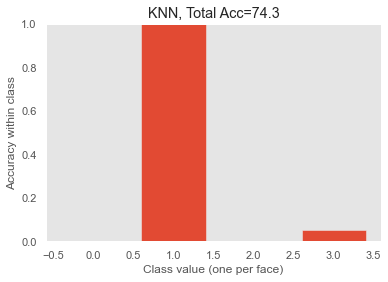

In [96]:
from sklearn import metrics as mt
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(le.inverse_transform(y_test_num),le.inverse_transform(yhat),title="KNN")

# Deployment (5 points total)
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
* One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?